In [4]:
import numpy as np
import pandas as pd
from functools import reduce
import statistics as stat
from scipy import stats as st
import scipy.stats as st
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df

In [5]:
matches=pd.read_csv('../data_limpio/matches_l.csv')
stadiums=pd.read_csv('../data_limpio/stadiums_l.csv')
players=pd.read_csv('../data_limpio/players_l.csv')
teams=pd.read_csv('../data_limpio/teams_l.csv')

In [6]:
matches.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Id_HomeTeam,Id_AwayTeam
0,0,SP1,2022-11-10,Real Madrid,Cadiz,2,1,H,1,0,H,18,10,5,5,12,16,7,1,3,3,0,0,1.14,8.5,15.00,1.15,8.25,18.50,14,5
1,1,SP1,2022-11-10,Rayo Vallecano,Celta Vigo,0,0,D,0,0,D,10,11,3,3,19,16,5,3,7,1,0,0,2.20,3.2,3.50,2.10,3.25,3.50,13,6
2,2,SP1,2022-11-10,Valencia,Betis,3,0,H,0,0,D,15,5,7,1,12,9,5,5,1,3,0,1,2.10,3.4,3.60,2.10,3.30,3.50,17,4
3,3,SP1,2022-11-09,Espanyol,Villarreal,0,1,A,0,0,D,14,10,6,3,11,6,4,7,1,3,0,0,3.20,3.2,2.37,3.00,3.25,2.37,8,19
4,4,SP1,2022-11-09,Almeria,Getafe,1,0,H,1,0,H,8,11,3,3,17,8,7,6,8,4,1,0,2.15,3.3,3.50,2.15,3.20,3.50,0,9


H    6725
D    4002
A    3892
Name: FTR, dtype: int64

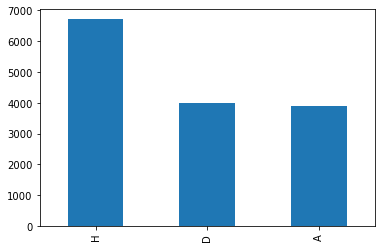

In [7]:
matches['FTR'].value_counts().plot(kind='bar')
matches['FTR'].value_counts()

Como podemos observar, gran parte de los partidos termina en victoria local

D    6529
H    4988
A    3102
Name: HTR, dtype: int64

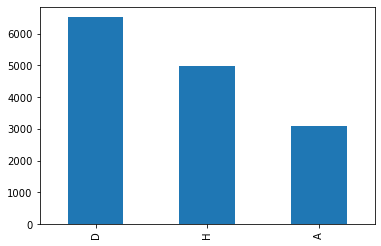

In [10]:
matches['HTR'].value_counts().plot(kind='bar')
matches['HTR'].value_counts()

En cambio, para la primera parte del partido tiene una clara ventaja el resultado empate entre los dos equipos.

In [9]:
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,14619.0,7309.000000,4220.286128,0.00,3654.50,7309.00,10963.5,14618.0
FTHG,14619.0,1.449347,1.232880,0.00,1.00,1.00,2.0,10.0
FTAG,14619.0,1.056570,1.064040,0.00,0.00,1.00,2.0,8.0
HTHG,14619.0,0.639510,0.798489,0.00,0.00,0.00,1.0,6.0
HTAG,14619.0,0.450304,0.675118,0.00,0.00,0.00,1.0,5.0
HS,14619.0,13.171284,3.851331,1.00,12.00,13.00,14.0,42.0
AS,14619.0,10.775087,3.405713,0.00,9.00,11.00,11.0,39.0
HST,14619.0,4.812778,1.991234,0.00,4.00,5.00,5.0,20.0
AST,14619.0,3.801423,1.708400,0.00,3.00,4.00,4.0,16.0
HF,14619.0,14.957931,3.638313,0.00,14.00,15.00,16.0,37.0


Observamos que en la tabla ambos equipos tienen alrededor de 15 faltas por partido tanto de media como de mediana, en cambio el visitante parece que recibe más tarjetas.

In [19]:
matches[(matches.AwayTeam == 'Real Madrid')].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,330.0,7313.448485,4230.919995,11.00,3657.50,7340.500,10936.50,14604.0
FTHG,330.0,1.048485,0.963189,0.00,0.00,1.000,2.00,5.0
FTAG,330.0,2.057576,1.493559,0.00,1.00,2.000,3.00,8.0
HTHG,330.0,0.448485,0.665302,0.00,0.00,0.000,1.00,4.0
HTAG,330.0,0.942424,0.995287,0.00,0.00,1.000,1.00,5.0
HS,330.0,12.354545,4.648600,4.00,9.00,12.000,15.00,35.0
AS,330.0,15.184848,5.231342,3.00,12.00,15.000,18.00,39.0
HST,330.0,3.975758,2.170405,0.00,2.00,4.000,5.00,12.0
AST,330.0,5.942424,2.656589,0.00,4.00,6.000,7.00,16.0
HF,330.0,16.121212,4.795246,1.00,13.00,16.000,19.00,37.0


In [20]:
matches[(matches.HomeTeam == 'Real Madrid')].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,330.0,7306.054545,4237.597093,0.00,3675.7500,7275.500,10956.25,14580.00
FTHG,330.0,2.718182,1.761451,0.00,2.0000,2.500,4.00,10.00
FTAG,330.0,0.918182,0.996637,0.00,0.0000,1.000,1.00,6.00
HTHG,330.0,1.206061,1.145877,0.00,0.0000,1.000,2.00,6.00
HTAG,330.0,0.460606,0.679683,0.00,0.0000,0.000,1.00,3.00
HS,330.0,19.103030,5.869010,4.00,15.0000,18.000,23.00,37.00
AS,330.0,10.490909,4.680839,1.00,7.0000,10.000,14.00,26.00
HST,330.0,7.642424,3.130304,1.00,5.0000,7.000,10.00,18.00
AST,330.0,3.536364,2.251689,0.00,2.0000,3.000,5.00,13.00
HF,330.0,13.463636,4.877859,5.00,9.0000,13.000,16.00,30.00


En el caso del Real Madrid tenemos que suele marcar 2 goles como visitante y casi 3 como Local. 
Por cada 3 tiros a puerta suele marcar un gol tanto en el caso de visitante como en el de local

<AxesSubplot:ylabel='Density'>

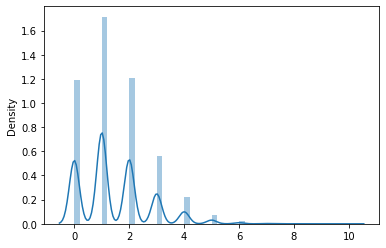

In [22]:
sns.distplot(matches[['FTHG']])